In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

rng = np.random.default_rng(0)

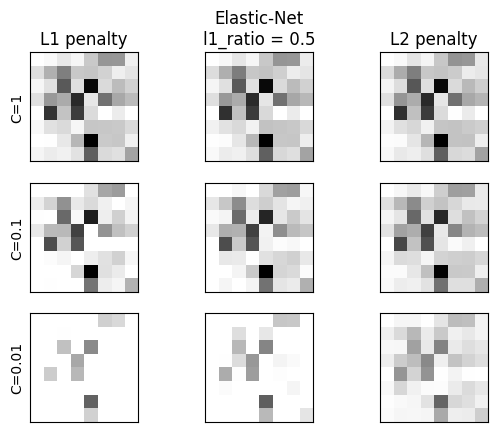

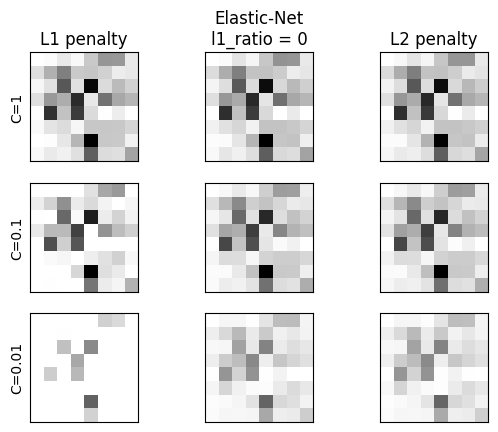

In [47]:
X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0  # L1 weight in the Elastic-Net regularization

C=1.00
Sparsity with L1 penalty:                6.250000%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                29.687500%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.375000%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.89
Score with L2 penalty:                   0.89


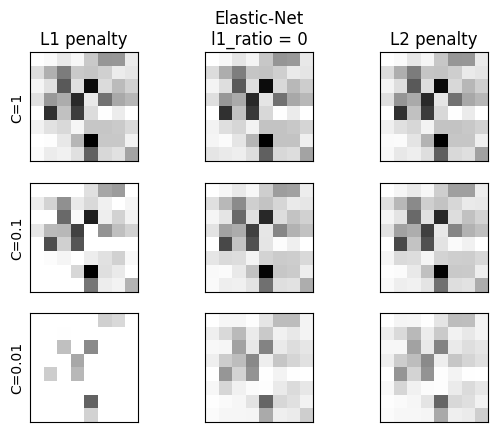

C=1.00
Sparsity with L1 penalty:                4.687500%
Sparsity with Elastic-Net penalty:       6.25%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                29.687500%
Sparsity with Elastic-Net penalty:       26.56%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.375000%
Sparsity with Elastic-Net penalty:       84.38%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.86
Score with L2 penalty:                   0.89


In [48]:
fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title(f"Elastic-Net\nl1_ratio = {l1_ratio}")
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"{C=}")

plt.show()

In [41]:
%load_ext gradio

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


C=1.00
Sparsity with L1 penalty:                4.687500%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                29.687500%
Sparsity with Elastic-Net penalty:       10.94%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.375000%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89
Keyboard interruption in main thread... closing server.


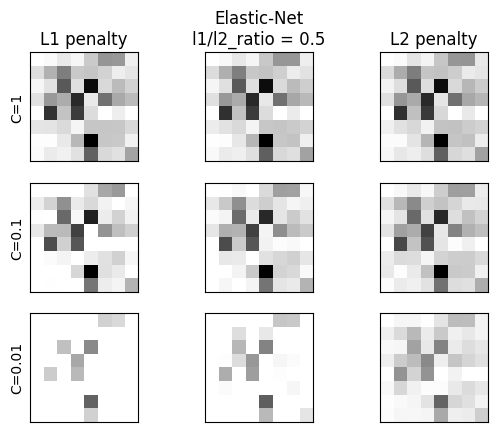

In [66]:
# %%blocks

import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

rng = np.random.default_rng(0)

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

md_description = """
# L1 Penalty and Sparsity in Logistic Regression

Comparison of the sparsity (percentage of zero coefficients) of solutions when L1, L2 and Elastic-Net penalty are used for different values of C. We can see that large values of C give more freedom to the model. Conversely, smaller values of C constrain the model more. In the L1 penalty case, this leads to sparser solutions. As expected, the Elastic-Net penalty sparsity is between that of L1 and L2.

We classify 8x8 images of digits into two classes: 0-4 against 5-9. The visualization shows coefficients of the models for varying C.
"""


def make_regression(l1_ratio):
    # import gradio as gr
    # import matplotlib.pyplot as plt
    # import plotly.express as px
    # import plotly.graph_objects as go
    # import numpy as np
    # from sklearn.linear_model import LogisticRegression
    # from sklearn import datasets
    # from sklearn.preprocessing import StandardScaler

    # rng = np.random.default_rng(0)

    # X, y = datasets.load_digits(return_X_y=True)

    # X = StandardScaler().fit_transform(X)

    # classify small against large digits
    # y = (y > 4).astype(int)

    fig, axes = plt.subplots(3, 3)

    # Set regularization parameter
    for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
        # Increase tolerance for short training time
        clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
        clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
        clf_en_LR = LogisticRegression(
            C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
        )
        clf_l1_LR.fit(X, y)
        clf_l2_LR.fit(X, y)
        clf_en_LR.fit(X, y)

        coef_l1_LR = clf_l1_LR.coef_.ravel()
        coef_l2_LR = clf_l2_LR.coef_.ravel()
        coef_en_LR = clf_en_LR.coef_.ravel()

        # coef_l1_LR contains zeros due to the
        # L1 sparsity inducing norm

        sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
        sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
        sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

        print(f"C={C:.2f}")
        print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:2f}%")
        print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
        print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
        print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
        print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
        print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

        log_out = f"""
        C={C:.2f}
        {'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:2f}%
        {'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%
        {'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%
        {'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}
        {'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}
        {'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}
        """

        if i == 0:
            axes_row[0].set_title("L1 penalty")
            axes_row[1].set_title(f"Elastic-Net\nl1/l2_ratio = {l1_ratio}")
            axes_row[2].set_title("L2 penalty")

        for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
            ax.imshow(
                np.abs(coefs.reshape(8, 8)),
                interpolation="nearest",
                cmap="binary",
                vmax=1,
                vmin=0,
            )
            ax.set_xticks(())
            ax.set_yticks(())

        axes_row[0].set_ylabel(f"{C=}")

    # plt.show()

    return fig, log_out, make_example(l1_ratio)


def make_example(l1_ratio):
    return f"""
    With the following code you can reproduce this example with the current values of the sliders and the same data in a notebook:

    ```python
    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn.linear_model import LogisticRegression
    from sklearn import datasets
    from sklearn.preprocessing import StandardScaler

    rng = np.random.default_rng(0)

    X, y = datasets.load_digits(return_X_y=True)

    X = StandardScaler().fit_transform(X)

    # classify small against large digits
    y = (y > 4).astype(int)

    l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

    fig, axes = plt.subplots(3, 3)

    # Set regularization parameter
    for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
        # Increase tolerance for short training time
        clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
        clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
        clf_en_LR = LogisticRegression(
            C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
        )
        clf_l1_LR.fit(X, y)
        clf_l2_LR.fit(X, y)
        clf_en_LR.fit(X, y)

        coef_l1_LR = clf_l1_LR.coef_.ravel()
        coef_l2_LR = clf_l2_LR.coef_.ravel()
        coef_en_LR = clf_en_LR.coef_.ravel()

        # coef_l1_LR contains zeros due to the
        # L1 sparsity inducing norm

        sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
        sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
        sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

        print(f"C={C:.2f}")
        print(f"{{'Sparsity with L1 penalty:':<40}} {{sparsity_l1_LR:2f}}%\")
        print(f"{{'Sparsity with Elastic-Net penalty:':<40}} {{sparsity_en_LR:.2f}}%")
        print(f"{{'Sparsity with L2 penalty:':<40}} {{sparsity_l2_LR:.2f}}%")
        print(f"{{'Score with L1 penalty:':<40}} {{clf_l1_LR.score(X, y):.2f}}")
        print(f"{{'Score with Elastic-Net penalty:':<40}} {{clf_en_LR.score(X, y):.2f}}")
        print(f"{{'Score with L2 penalty:':<40}} {{clf_l2_LR.score(X, y):.2f}}")

        if i == 0:
            axes_row[0].set_title("L1 penalty")
            axes_row[1].set_title(f"Elastic-Net\\nl1/l2_ratio = {l1_ratio}")
            axes_row[2].set_title("L2 penalty")

        for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
            ax.imshow(
                np.abs(coefs.reshape(8, 8)),
                interpolation="nearest",
                cmap="binary",
                vmax=1,
                vmin=0,
            )
            ax.set_xticks(())
            ax.set_yticks(())

        axes_row[0].set_ylabel(f"{C=}")
    plt.show()
    ```
    """


with gr.Blocks() as demo:
    with gr.Row():
        gr.Markdown(md_description)
    with gr.Row():
        with gr.Column():
            ratio_slider = gr.Slider(minimum=0, maximum=1, label="L1/L2 ratio", step=0.1, value=0.5)
            button = gr.Button(value="Generate")
        with gr.Column():
            plot = gr.Plot(label="Output")
            log = gr.Markdown("")

    with gr.Row():
        example = gr.Markdown(make_example(l1_ratio))
        button.click(make_regression, inputs=[ratio_slider], outputs=[plot, log, example])
        ratio_slider.change(fn=make_regression, inputs=[ratio_slider], outputs=[plot, log, example])
        # slider_1.change(fn=make_example,
        #     inputs=[slider_1, slider_2],
        #     outputs=example)
        # slider_2.change(fn=make_regression,
        #     inputs=[slider_1, slider_2],
        #     outputs=plot)
        # slider_2.change(fn=make_example,
        #     inputs=[slider_1, slider_2],
        #     outputs=example)

demo.launch(debug=True)

In [8]:
from itertools import product

list(product(range(3), range(3)))

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [22]:
# import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# import pandas as pd

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=X[:,0], y=y, mode='markers', name='data'))
# fig.add_trace(go.Scatter(x=X_test[:,0], y=y_1, mode='lines', name=f"{'1'}"))
# fig.add_trace(go.Scatter(x=X_test[:,0], y=y_2, mode='lines', name=f"{'2'}"))

# fig.show()


titles = ["L1 penalty", f"Elastic-Net\nl1_ratio = {l1_ratio}", "L2 penalty"] + [""] * 6


# fig = make_subplots(rows=3, cols=3, subplot_titles=titles)

# fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, row) in enumerate(zip([1, 0.1, 0.01], range(3))):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

    for col, coefs in zip(range(3), [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        fig.add_trace(
            px.imshow(1 - np.abs(coefs.reshape(8, 8)), binary_string=True), row=row, col=col
        )
        break
    break

#     if i == 0:
#         axes_row[0].set_title("L1 penalty")
#         axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
#         axes_row[2].set_title("L2 penalty")

#     for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
#         ax.imshow(
#             np.abs(coefs.reshape(8, 8)),
#             interpolation="nearest",
#             cmap="binary",
#             vmax=1,
#             vmin=0,
#         )
#         ax.set_xticks(())
#         ax.set_yticks(())

#     axes_row[0].set_ylabel("C = %s" % C)

# fig.show()

C=1.00
Sparsity with L1 penalty:                6.250000%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90


ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'hovertemplate': 'x: %{x}<br>y: %{y}<extra></extra>',
              'name': '0',
              'source': ('data:image/png;base64,iVBORw0K' ... 'a3Qr8iZ/Bwh/8AAAAASUVORK5CYII='),
              'type': 'image',
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

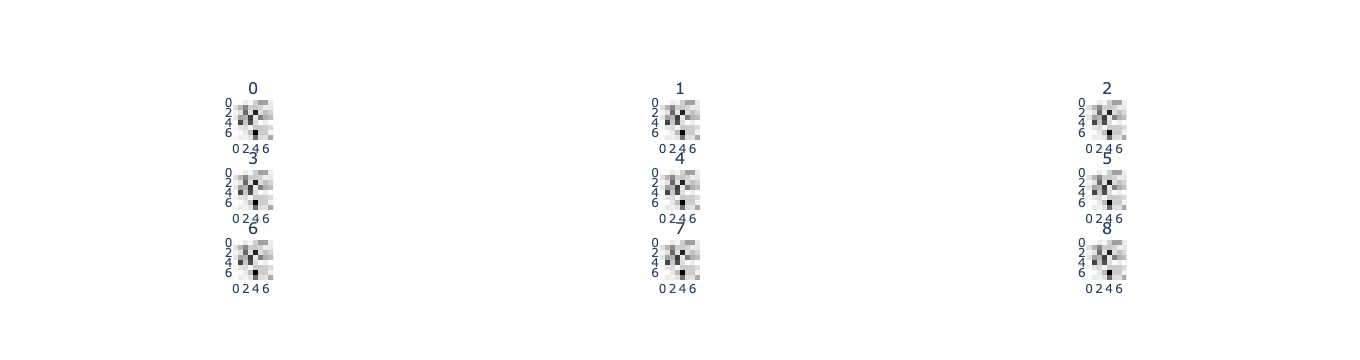

In [37]:
fig = make_subplots(rows=3, cols=3, subplot_titles=[str(i) for i in range(9)])

for i, j in product(range(1, 4), range(1, 4)):
    fig.add_trace(
        px.imshow(1 - np.abs(coefs.reshape(8, 8)), binary_string=True).data[0], row=i, col=j
    )

# layout = px.imshow(1-np.abs(coefs.reshape(8, 8)), binary_string=True).layout
# fig.layout.coloraxis = layout.coloraxis
# fig.update_xaxes(**layout.xaxis.to_plotly_json())
# fig.update_yaxes(**layout.yaxis.to_plotly_json())

fig.show()

In [5]:
%load_ext gradio

C=0.01
Sparsity with L1 penalty:                6.250000%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                29.687500%
Sparsity with Elastic-Net penalty:       12.50%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.375000%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


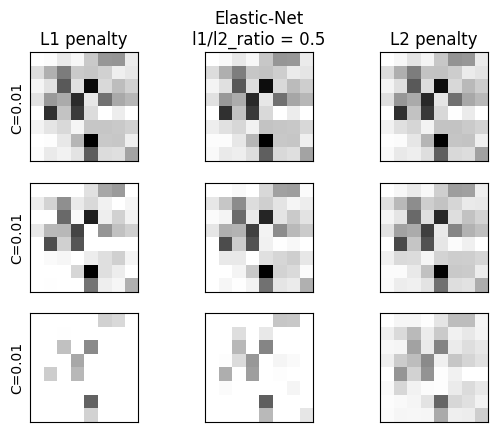

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

rng = np.random.default_rng(0)

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print(f"C=0.01")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title(f"Elastic-Net\nl1/l2_ratio = 0.5")
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C=0.01")
plt.show()